In [1]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
i = scipy.datasets.ascent()

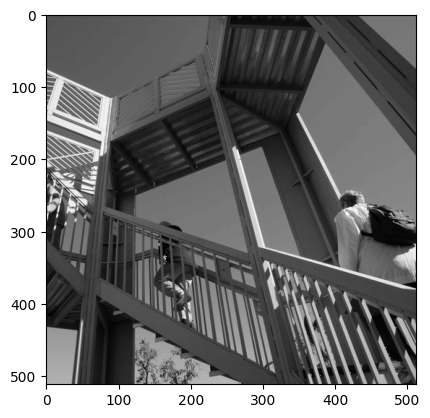

In [2]:
plt.grid(False)
plt.gray()
plt.imshow(i)
plt.show()

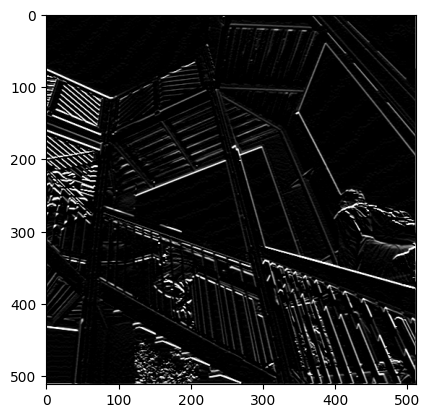

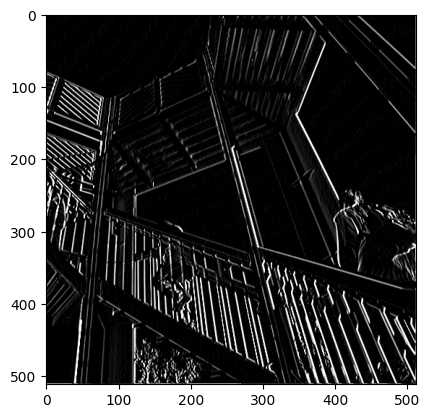

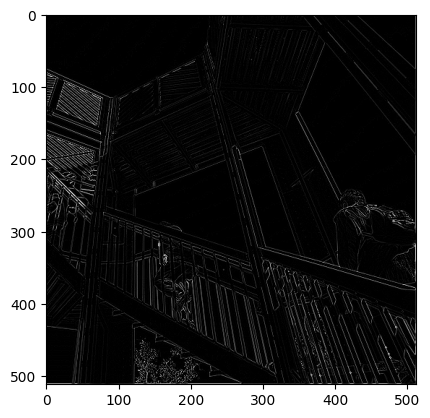

In [3]:
def apply_filter(image, filter, STRIDE = 1):
    i_transformed = np.copy(image)
    size_y = image.shape[0]
    size_x = image.shape[1]
    radius = filter.shape[1] // 2
    for x in range(radius, size_x - radius, STRIDE):
        for y in range(radius, size_y - radius, STRIDE):
            block = image[x-radius:x+radius+1, y-radius:y+radius+1]
            output = block * filter
            output = output.sum() * (1 / max(filter.sum(), 1))
            if output < 0:
                output = 0
            elif output > 255:
                output = 255
            i_transformed[x, y] = output
    return i_transformed

# Horizontal Lines Filter
filter1 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Vertical Lines Filter
filter2 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
filter3 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

filters = np.array([filter1, filter2, filter3])

weight = 1
STRIDE = 1

for filter in filters:
    image = apply_filter(np.copy(i), filter, STRIDE)
    plt.gray()
    plt.grid(False)
    plt.imshow(image)
    plt.show()

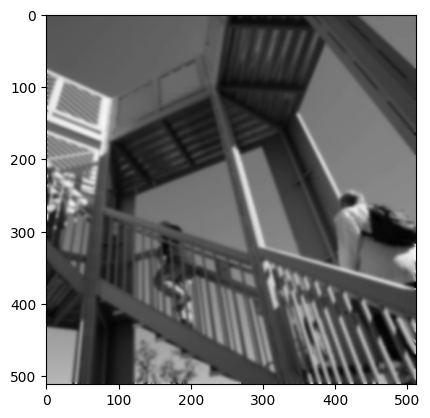

In [4]:
gaussian_filter = np.array([
    [1,  4,  7,  4,  1],
    [4, 16, 26, 16,  4],
    [7, 26, 41, 26,  7],
    [4, 16, 26, 16,  4],
    [1,  4,  7,  4,  1]
])

image = apply_filter(np.copy(i), gaussian_filter, STRIDE=1)
for _ in range(3):
    image = apply_filter(image, gaussian_filter, STRIDE=1)
plt.grid(False)
plt.imshow(image)
plt.show()

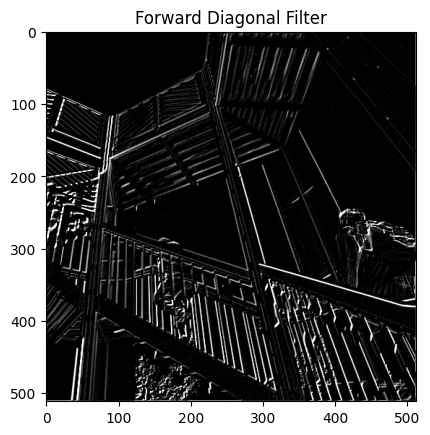

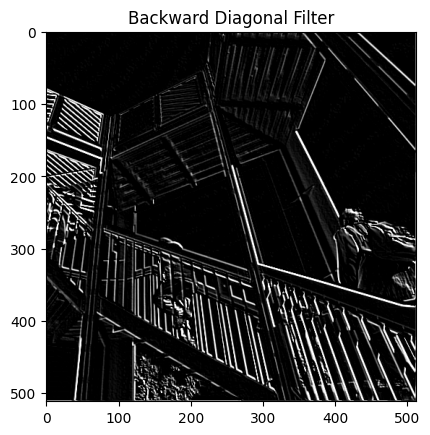

In [5]:
# Forward Diagonal Filter
forward_diagonal_filter = np.array([
    [ 2,  1,  0],
    [ 1,  0, -1],
    [ 0, -1, -2],
])

backward_diagonal_filter = np.array([
    [ 0,  1,  2],
    [-1,  0, 1],
    [-2, -1,  0],
])

image = apply_filter(np.copy(i), forward_diagonal_filter, STRIDE = 1)
plt.imshow(image)
plt.title("Forward Diagonal Filter")
plt.show()
image = apply_filter(np.copy(i), backward_diagonal_filter, STRIDE = 1)
plt.imshow(image)
plt.title("Backward Diagonal Filter")
plt.show()

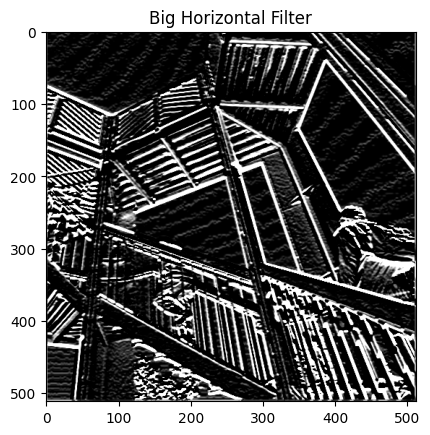

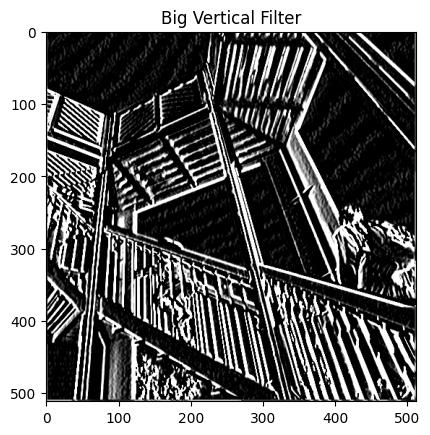

In [6]:
big_horizontal_filter = np.array([
    [-1, -2, -4, -2, -1],
    [-2, -4, -8, -4, -2],
    [ 0,  0,  0,  0,  0],
    [ 2,  4,  8,  4,  2],
    [ 1,  2,  4,  2,  1]
])

big_vertical_filter = np.array([
    [-1, -2,  0,  2,  1],
    [-2, -4,  0,  4,  2],
    [-4, -8,  0,  8,  4],
    [-2, -4,  0,  4,  2],
    [-1, -2,  0,  2,  1],
])

image = apply_filter(np.copy(i), big_horizontal_filter, STRIDE = 1)
plt.imshow(image)
plt.title("Big Horizontal Filter")
plt.show()
image = apply_filter(np.copy(i), big_vertical_filter, STRIDE = 1)
plt.imshow(image)
plt.title("Big Vertical Filter")
plt.show()

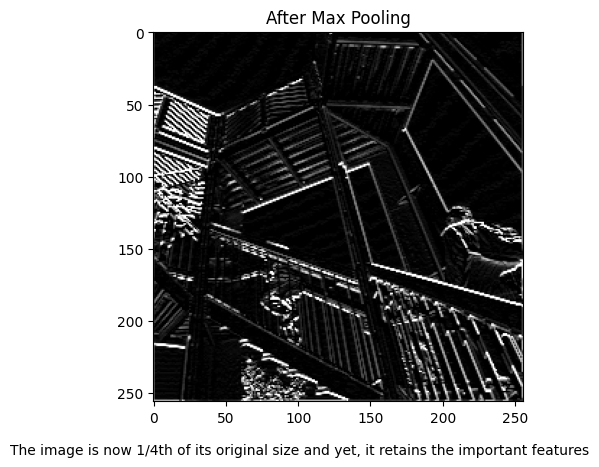

In [17]:
# Pooling
def pooling_max(image, size = 2):
    size_x = image.shape[1]
    size_y = image.shape[0]
    x_new = size_x // 2
    y_new = size_y // 2
    pooled_image = np.zeros((y_new, x_new))
    for j in range(0, size_y, 2):
        for i in range(0, size_x, 2):
            pooled_image[i//2, j//2] = max(image[i,j], image[i+1,j], image[i, j+1], image[i+1, j+1])
    return pooled_image

i_transformed = apply_filter(np.copy(i), filter1, STRIDE=1)            
image = pooling_max(np.copy(i_transformed))
plt.imshow(image)
plt.title("After Max Pooling")
plt.figtext(0, 0, "The image is now 1/4th of its original size and yet, it retains the important features")
plt.show()